In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None) #configuracion del pandas
ds = pd.read_csv(r'C:/Users/artu_/Documents/tarea/ESCOM/4S/Analisis de datos/Proyecto/movie_dataset.csv') #carga del dataset
ds2 = pd.read_csv(r'C:/Users/artu_/Documents/tarea/ESCOM/4S/Analisis de datos/Proyecto/Movies_select.csv') #carga del dataset
print("Dimensiones del dataset:")
print(ds.columns) #impresion de las columnas o dimensiones del dataset

Dimensiones del dataset:
Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')


In [3]:
ds.drop(['index', 'budget', 'homepage', 'id', 'original_language', 'original_title', 'popularity', 'production_countries', 'release_date',
        'overview','vote_count', 'revenue', 'production_companies', 'runtime', 'spoken_languages', 'status', 'tagline', 'crew'],
        axis=1, inplace=True)
print("DataFrame después de eliminar las columnas:")
print(ds.info())
display(ds.head())
print("\nColumnas restantes:")
display(ds.columns.tolist())

DataFrame después de eliminar las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        4775 non-null   object 
 1   keywords      4391 non-null   object 
 2   title         4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   cast          4760 non-null   object 
 5   director      4773 non-null   object 
dtypes: float64(1), object(5)
memory usage: 225.3+ KB
None


,genres,keywords,title,vote_average,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Avatar,7.2,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Pirates of the Caribbean: At World's End,6.9,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,Spectre,6.3,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Dark Knight Rises,7.6,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,John Carter,6.1,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton



Columnas restantes:


['genres', 'keywords', 'title', 'vote_average', 'cast', 'director']

In [4]:
# Limpieza de la columna 'title' en ambos DataFrames (suponiendo que se usa 'title' para unir)
ds['title'] = ds['title'].str.strip().str.lower()
ds2['title'] = ds2['title'].str.strip().str.lower()

# Realizar la unión de los DataFrames usando 'title' como columna común y método inner
df_merged = pd.merge(ds, ds2, on='title', how='inner')

# Opcional: Eliminar columnas duplicadas si no necesitas las versiones con los sufijos '_x' y '_y'
df_merged = df_merged.loc[:, ~df_merged.columns.duplicated()]  # Mantiene solo una columna si están duplicadas

# Mostrar el DataFrame resultante
print("DataFrame después de la unión:")
print(df_merged.info())
display(df_merged.head())


DataFrame después de la unión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres_x        0 non-null      object 
 1   keywords        0 non-null      object 
 2   title           0 non-null      object 
 3   vote_average_x  0 non-null      float64
 4   cast_x          0 non-null      object 
 5   director_x      0 non-null      object 
 6   genres_y        0 non-null      object 
 7   keywords	       0 non-null      object 
 8   vote_average_y  0 non-null      float64
 9   cast_y          0 non-null      object 
 10  director_y      0 non-null      object 
dtypes: float64(2), object(9)
memory usage: 132.0+ bytes
None


,genres_x,keywords,title,vote_average_x,cast_x,director_x,genres_y,keywords\t,vote_average_y,cast_y,director_y


In [5]:
# Por cada dimensión, indicar si son numéricas o categóricas, lo que representan 
# y el tipo de dato utilizado para tal representación.
def get_column_info(ds): #funcion para analisar las dimensiones
    info = [] #inicializacion de la lista
    for col in ds.columns: #ciclo para evaluar cada uno en el proceso
        dtype = ds[col].dtype #obtencion del tipo de dato que tiene cada columna
        if pd.api.types.is_numeric_dtype(ds[col]): # clasificacion de cada columna por medio del tipo de dato
            col_type = 'Numérica'
        else:
            col_type = 'Categórica'
        info.append({'Columna': col, 'Tipo': col_type, 'Dtype': dtype}) #guardar los datos de cada columna
    return pd.DataFrame(info) #regresar la lista con los datos: nombre de columna, tipo de categoria y tipo de dato

print("\nInformación de tipos de datos:")
display(get_column_info(ds))


Información de tipos de datos:


,Columna,Tipo,Dtype
0,genres,Categórica,object
1,keywords,Categórica,object
2,title,Categórica,object
3,vote_average,Numérica,float64
4,cast,Categórica,object
5,director,Categórica,object


In [6]:
#Identificar en cada dimension la cantidad de valores nulos y dar un porcentaje de estos
def porcentaje(valor, total):# funcion que regresa el porcentaje
    return (valor / total) * 100
# Calcular valores nulos por dimensión
total_filas = len(ds)
valores_nulos = [] 
for columna in ds.columns: #ciclo que recorrera cada dimension
    nulos = ds[columna].isnull().sum() # suma de valores nulos por dimension
    porcentaje_nulos = porcentaje(nulos, total_filas)
    
    valores_nulos.append({ #se almacenan en la lista
        'Dimensión': columna,
        'Valores Nulos': nulos,
        'Porcentaje Nulos': round(porcentaje_nulos, 2)
    })
# se crear DataFrame con los resultados
resultado_nulos = pd.DataFrame(valores_nulos)

# Mostrar el resultado
print("Valores nulos por dimensión:")
display(resultado_nulos)


Valores nulos por dimensión:


,Dimensión,Valores Nulos,Porcentaje Nulos
0,genres,28,0.58
1,keywords,412,8.58
2,title,0,0.00
3,vote_average,0,0.00
4,cast,43,0.90
5,director,30,0.62


In [7]:
# Calcular valores duplicados por dimensión
total_filas = len(ds)
valores_duplicados = []

for columna in ds.columns: # ciclo para ontar valores únicos y duplicados
    conteo_valores = ds[columna].value_counts() # se cuenta la frecuencia de cada valor unico
    duplicados = conteo_valores[conteo_valores > 1].sum() # se filtra para solo contar los que tiene duplicados
    valores_duplicados.append({ # llenar lista con los datos de cada columna 
        'Dimensión': columna,
        'Valores Duplicados': duplicados,
    })

# crear DataFrame con los resultados
resultado_duplicados = pd.DataFrame(valores_duplicados)

# mostrar el resultado
print("Valores duplicados por dimensión:")
display(resultado_duplicados)

Valores duplicados por dimensión:


,Dimensión,Valores Duplicados
0,genres,4044
1,keywords,203
2,title,6
3,vote_average,4795
4,cast,30
5,director,3298


In [8]:
duplicados = ds[ds.duplicated(subset='title', keep=False)]

# Mostrar los títulos duplicados y su conteo
print("Títulos duplicados encontrados:")
display(duplicados)

Títulos duplicados encontrados:


,genres,keywords,title,vote_average,cast,director
972,Action Adventure Romance Science Fiction Thriller,based on novel mass murder dystopia genocide a...,the host,6.0,Saoirse Ronan Diane Kruger Jake Abel William H...,Andrew Niccol
1359,Fantasy Action,double life dc comics dual identity chemical c...,batman,7.0,Jack Nicholson Michael Keaton Kim Basinger Mic...,Tim Burton
2877,Horror Drama Science Fiction,river mobile phone bravery archer daughter,the host,6.7,Song Kang-ho Park Hae-il Bae Doona Ko Ah-sung ...,Bong Joon-ho
3647,Drama,punk independent film coming of age teenage gi...,out of the blue,6.5,Dennis Hopper Raymond Burr Sharon Farrell Lind...,Dennis Hopper
3693,Drama,new zealand gun rampage police independent fil...,out of the blue,5.9,Karl Urban Tandi Wright Simon Ferry Matthew Su...,Robert Sarkies
4267,Family Adventure Comedy Science Fiction Crime,submarine dc comics missile shark attack rescue,batman,6.1,Adam West Burt Ward Lee Meriwether Cesar Romer...,Leslie H. Martinson


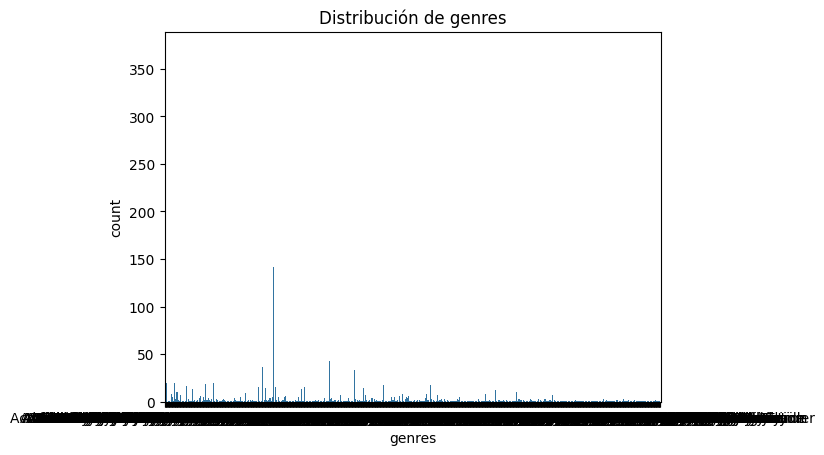

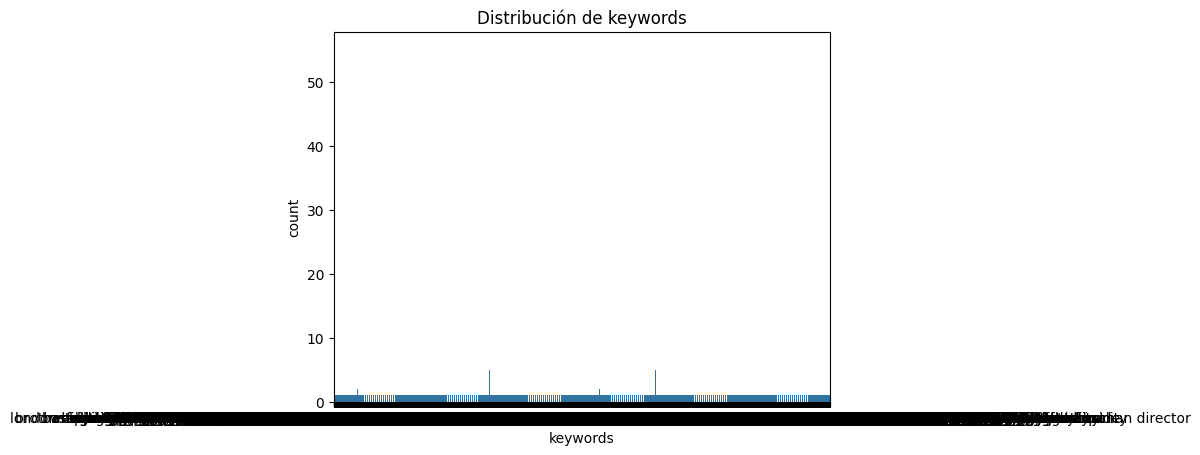

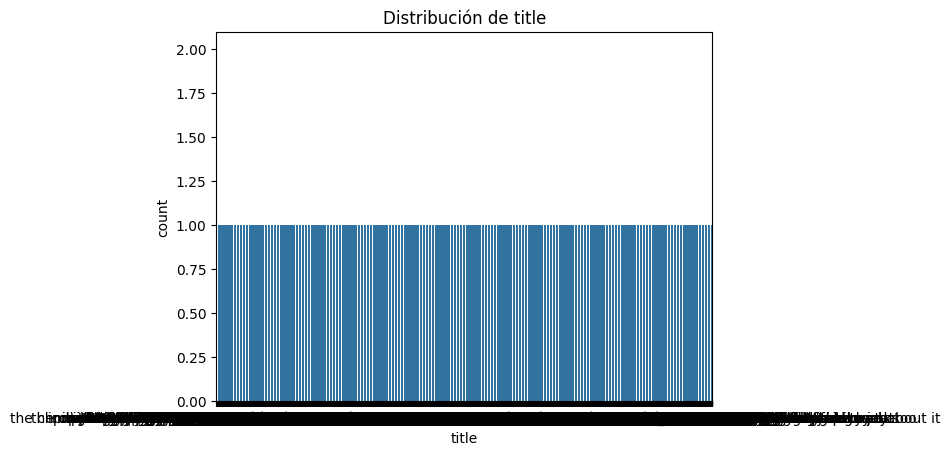

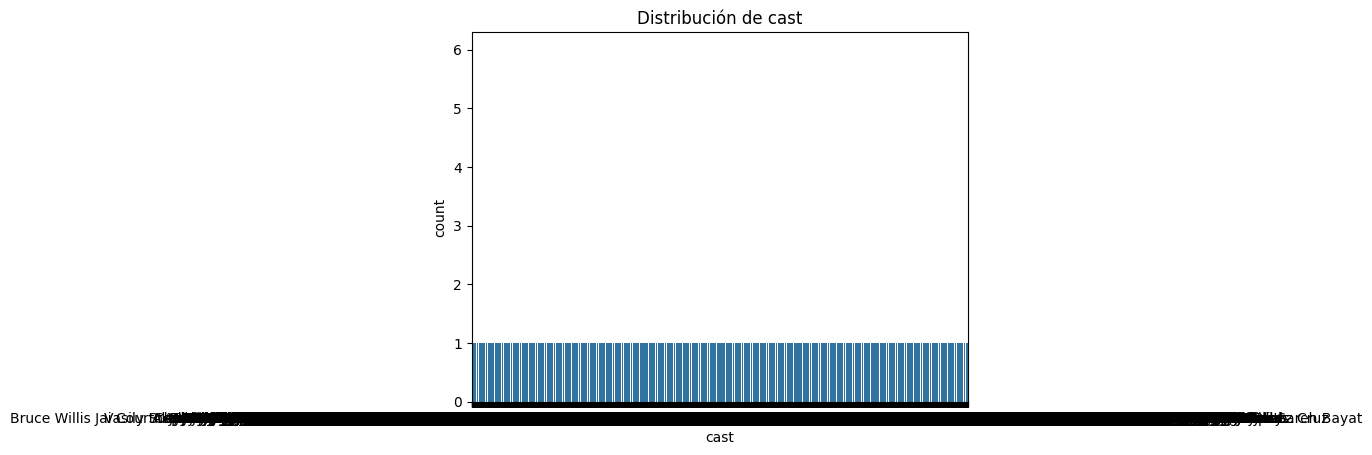

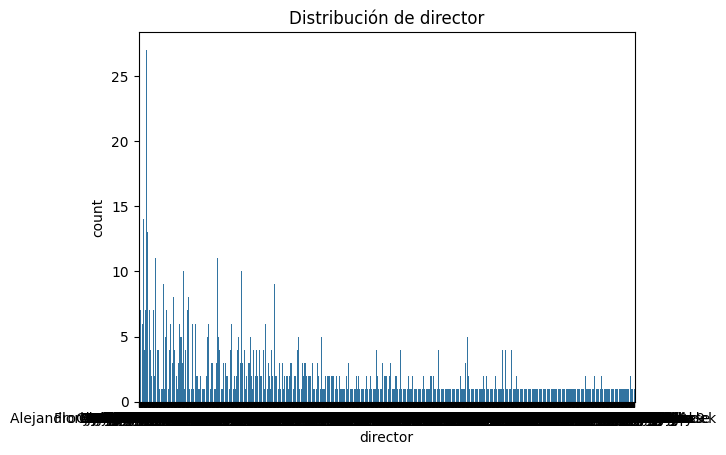

In [9]:
#Graficas categoricas
def es_categorica(columna): #funcion para clasificar las columnas categoricas
    return columna.dtype == 'object'
columnas_categoricas = [col for col in ds.columns if es_categorica(ds[col])] #se filtran con la funcion
for columna in columnas_categoricas: # genera las graficas de distribucion
    sns.countplot(x=columna, data=ds)
    plt.title(f'Distribución de {columna}')
    plt.show()

In [10]:
ds['genres'] = ds['genres'].fillna('')  # Reemplazar NaN por un string vacío para evitar errores
ds['genres'] = ds['genres'].apply(lambda x: x.split(' ') if x else [])  # Dividir los géneros por espacios

# Crear una nueva tabla con un registro por cada género y película
genero_peliculas = []

for index, row in ds.iterrows():
    for genero in row['genres']:
        genero_peliculas.append({
            'genero': genero,
            'title': row['title'],
            'vote_average': row['vote_average'],
            'cast': row['cast'],  # Aquí puedes añadir las columnas que necesites
            'director': row['director']
        })

# Convertir la lista de diccionarios a un DataFrame
tabla_generos = pd.DataFrame(genero_peliculas)

# Guardar en un archivo CSV que puedas usar en tu base de datos
tabla_generos.to_csv('tabla_generos.csv', index=False)

# Mostrar un resumen de la nueva tabla
print("\nNueva tabla de géneros y películas:")
display(tabla_generos.head())


Nueva tabla de géneros y películas:


,genero,title,vote_average,cast,director
0,Action,avatar,7.2,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure,avatar,7.2,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
2,Fantasy,avatar,7.2,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
3,Science,avatar,7.2,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
4,Fiction,avatar,7.2,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron


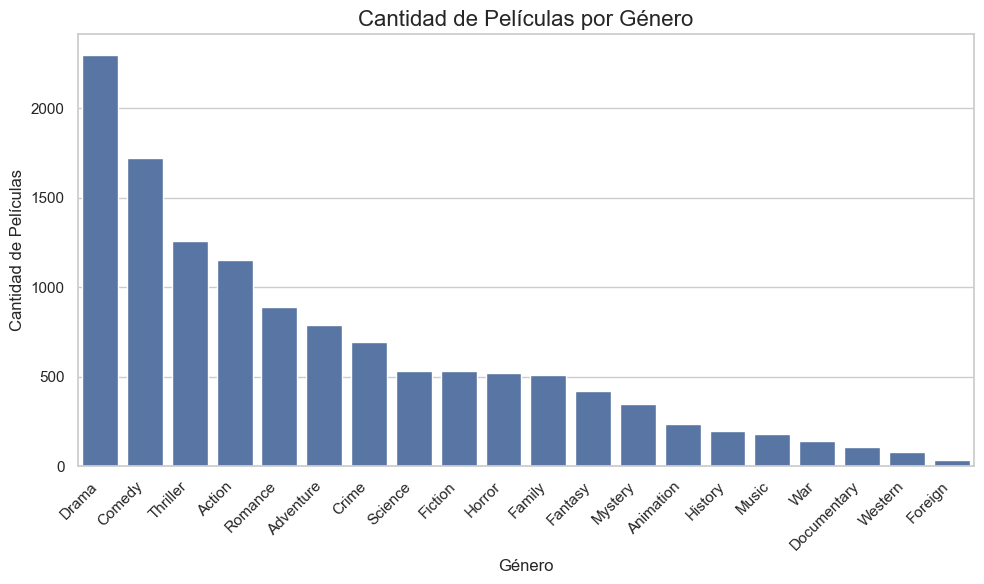

In [11]:
tabla_generos= tabla_generos[~tabla_generos['genero'].str.contains('TV|Movie', case=False, na=False)]

genero_counts = tabla_generos['genero'].value_counts()

# Configuración del estilo de la gráfica
sns.set(style="whitegrid")

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=genero_counts.index, y=genero_counts.values)

# Añadir títulos y etiquetas
plt.title('Cantidad de Películas por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Películas', fontsize=12)

# Rotar los nombres de los géneros si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

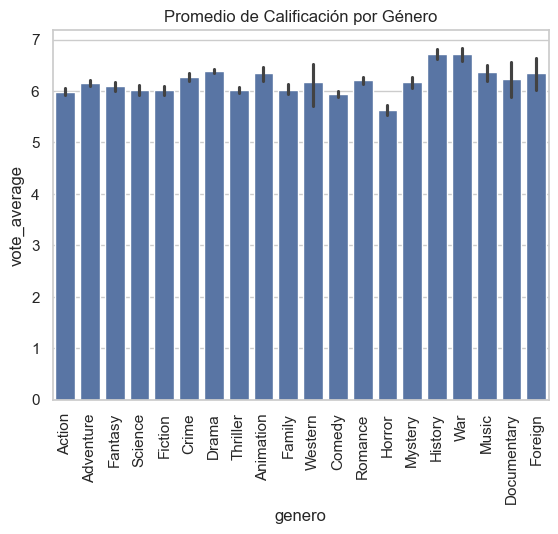

In [16]:
# Graficar la calificación promedio (vote_average) por género
sns.barplot(data=tabla_generos, x='genero', y='vote_average', estimator=np.mean)
plt.title('Promedio de Calificación por Género')
plt.xticks(rotation=90)  # Rotar los nombres de los géneros
plt.show()


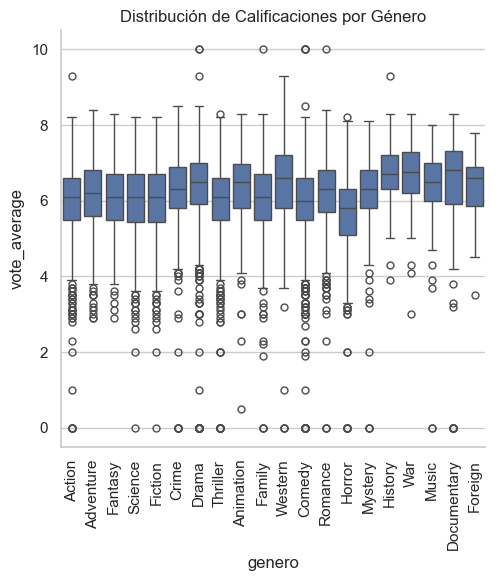

In [17]:
# Graficar la relación entre género y calificación promedio
sns.catplot(data=tabla_generos, x='genero', y='vote_average', kind='box')
plt.title('Distribución de Calificaciones por Género')
plt.xticks(rotation=90)  # Mejorar legibilidad
plt.show()


In [21]:
tabla_generos.to_csv('tabla_generos.csv', index=False)